In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
org_dataset = pd.read_csv(r'../dataset/iris.csv')
org_dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
unlabeled_dataset = org_dataset.drop(columns='variety')
unlabeled_dataset.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [5]:
wcss = []
ss = []

for i in range(2,21):
    kmc = KMeans(n_clusters=i, init='k-means++')
    kmc.fit(unlabeled_dataset)
    wcss.append(kmc.inertia_)
    ss.append(silhouette_score(unlabeled_dataset, kmc.labels_))

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python313

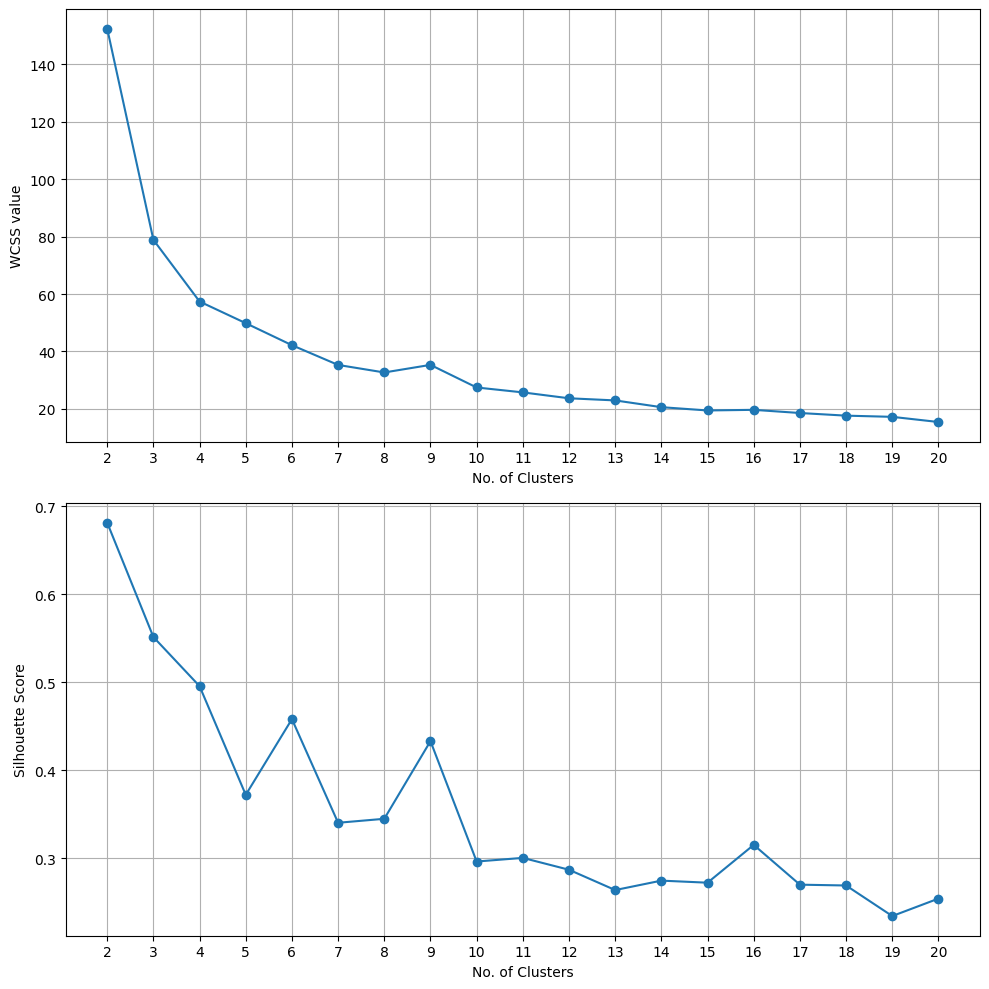

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))

# First plot (WCSS)
axes[0].plot([i for i in range(2,21)], wcss, marker='o')
axes[0].set_xlabel("No. of Clusters")
axes[0].set_ylabel("WCSS value")
axes[0].set_xticks([i for i in range(2,21)])
axes[0].grid(axis="both")

# Second plot (Silhouette Score)
axes[1].plot([i for i in range(2,21)], ss, marker='o')
axes[1].set_xlabel("No. of Clusters")
axes[1].set_ylabel("Silhouette Score")
axes[1].set_xticks([i for i in range(2,21)])
axes[1].grid(axis="both")

plt.tight_layout()
plt.show()


In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
ss1 = []

for i in range(2, 21):
    hc = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='complete')
    hc.fit(unlabeled_dataset)
    ss1.append(silhouette_score(unlabeled_dataset, hc.labels_))

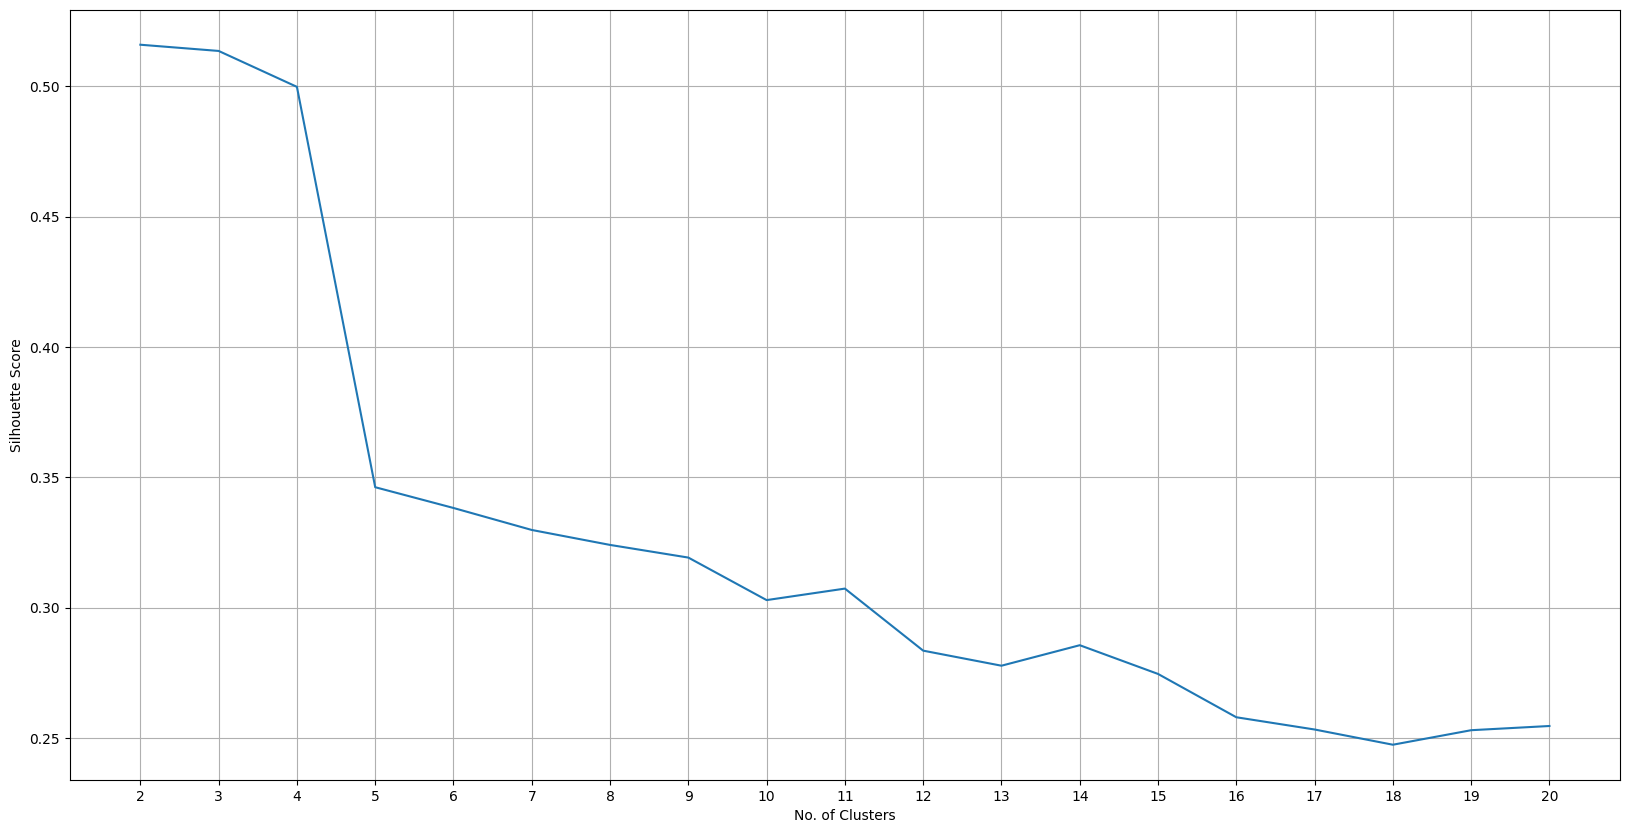

In [11]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(2,21)], ss1)
plt.xlabel("No. of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks([i for i in range(2,21)])
plt.grid(axis='both')
plt.show()